In [1]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [2]:
# Create list of all targets (minus background noise)
dataset_path = './recording2'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['backgroundNoise', 'ㄏㄧㄡ', 'ㄟ', '他', '你', '吼', '啦', '嗯', '好', '我', '的', '的一個', '的這個', '的那個', '著', '那', '那那個', '阿']


In [3]:
# Settings
feature_sets_path = './'
feature_sets_filename = 'recording2.npz'
model_filename = 'recording2.h5'
#wake_word = '嗯'

In [4]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [5]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']
print(y_test)
print(y_train)
print(y_val)

[ 8. 11.  7. 14.  3. 12. 14.  3.  9. 15. 13.  4.  9.  7.  7.  6. 13. 12.
 11.  9. 16.  7.  6. 14. 13. 10.  5. 17.  3.  6. 13. 14. 11.  9.  1.  4.
  5.  4.  4. 15. 13.  5.  9.  1.  2. 10.  4. 10.  6.  5. 12.  9.  7. 15.
 11. 13. 11. 12.  8. 15.  5.  6. 11. 10. 13.  3.  0. 17. 10.  6.  6. 11.]
[ 7. 16.  1.  4.  3. 12.  6. 17.  3. 14. 14.  9.  2. 12. 14. 13. 15.  8.
  9.  5.  8.  1.  5.  3.  6. 15.  3. 17. 12. 16. 16. 10. 15.  7. 11.  6.
  4.  5.  2. 17. 14.  9.  2.  9.  6. 17.  4. 10. 13. 11. 16.  2. 16.  2.
  9. 16. 13.  8. 11.  3. 16.  5.  1. 11.  1.  2.  3.  2.  8. 10. 12. 12.
  5. 14.  6.  0.  0.  8. 14.  4.  2. 13. 10.  2.  9. 17.  4.  0.  9. 15.
  3.  7.  0.  2.  2. 10.  1.  9. 11.  9.  0. 11. 17.  5. 15. 14.  3.  1.
 17. 16.  7. 14. 13.  0. 15. 11.  7.  6.  2.  4. 16.  4. 10. 16.  9.  6.
 16.  0. 10. 12. 13. 13. 11.  3.  2. 12.  5. 12.  7.  6.  7.  7. 12.  0.
 15. 15.  4.  0. 11.  1. 12.  9.  9.  1.  6.  3.  7. 15.  9. 11.  2.  8.
 14. 16. 10. 10.  0. 11. 14.  5. 11. 10. 11.  0.  

In [6]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(576, 23, 6)
(72, 23, 6)
(72, 23, 6)


In [7]:
# Peek at labels
print(y_val)

[ 7.  2. 16. 14.  2. 13.  4. 16.  0.  2. 13.  0. 10.  2.  0.  2. 10.  2.
  6. 10. 14.  9.  8. 13. 10. 11.  2.  6.  8. 10. 14. 16.  5.  9. 12. 13.
  0. 14.  1.  1.  4. 13. 11. 15. 16.  6. 17.  5. 16.  0.  9. 16. 13. 17.
 17. 15.  7.  3. 10. 17.  0.  4.  4. 15.  2.  8.  4. 13. 15. 17. 10.  1.]


In [8]:
# Peek at labels after conversion
print(y_test)

[ 8. 11.  7. 14.  3. 12. 14.  3.  9. 15. 13.  4.  9.  7.  7.  6. 13. 12.
 11.  9. 16.  7.  6. 14. 13. 10.  5. 17.  3.  6. 13. 14. 11.  9.  1.  4.
  5.  4.  4. 15. 13.  5.  9.  1.  2. 10.  4. 10.  6.  5. 12.  9.  7. 15.
 11. 13. 11. 12.  8. 15.  5.  6. 11. 10. 13.  3.  0. 17. 10.  6.  6. 11.]


In [9]:
# View the dimensions of our input data
print(x_train.shape)

(576, 23, 6)


In [10]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(576, 23, 6, 1)
(72, 23, 6, 1)
(72, 23, 6, 1)


In [11]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(23, 6, 1)


In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu',input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(1, 1)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(1, 1)))

model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(1, 1)))
model.add(layers.Dropout(0.05))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.05))
model.add(layers.Dense(18, activation='softmax'))
# Display model
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 22, 5, 32)         160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 5, 32)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 21, 4, 64)         8256      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 21, 4, 64)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 3, 128)        32896     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 20, 3, 128)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 3, 128)       

In [24]:
from tensorflow.keras import optimizers
# Add training parameters to model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',    #'adam'
              metrics=['acc'])

In [25]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=50,
                    batch_size=100,
                    validation_data=(x_val, y_val))

Epoch 1/50
6/6 [==============================] - 1s 48ms/step - loss: 2.7473 - acc: 0.1233 - val_loss: 2.3923 - val_acc: 0.2917
Epoch 2/50
6/6 [==============================] - 0s 20ms/step - loss: 2.0302 - acc: 0.4635 - val_loss: 1.6424 - val_acc: 0.5556
Epoch 3/50
6/6 [==============================] - 0s 20ms/step - loss: 1.3151 - acc: 0.6076 - val_loss: 1.1451 - val_acc: 0.6250
Epoch 4/50
6/6 [==============================] - 0s 20ms/step - loss: 0.9214 - acc: 0.6997 - val_loss: 0.8563 - val_acc: 0.7222
Epoch 5/50
6/6 [==============================] - 0s 20ms/step - loss: 0.6600 - acc: 0.7760 - val_loss: 0.7687 - val_acc: 0.7639
Epoch 6/50
6/6 [==============================] - 0s 20ms/step - loss: 0.5144 - acc: 0.8212 - val_loss: 0.7257 - val_acc: 0.6944
Epoch 7/50
6/6 [==============================] - 0s 21ms/step - loss: 0.4081 - acc: 0.8681 - val_loss: 0.8419 - val_acc: 0.7917
Epoch 8/50
6/6 [==============================] - 0s 20ms/step - loss: 0.3885 - acc: 0.8507 - val

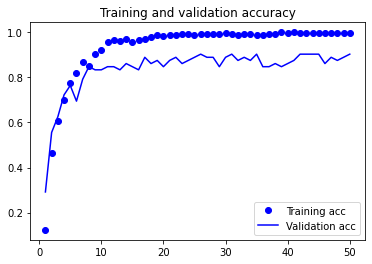

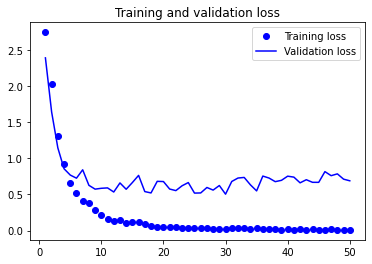

In [26]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
# Save the model as a file
#Test1.h5
models.save_model(model, model_filename)

In [28]:
# TEST: Load model and run it against test set
model = models.load_model(model_filename)
for i in range(0, 10):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

Answer: 8.0  Prediction: [[1.0957034e-12 1.1763436e-12 7.8697342e-09 4.4675380e-07 2.0041875e-15
  2.4691769e-07 1.2369760e-08 3.0230643e-14 9.9999869e-01 3.7420628e-13
  2.9998546e-13 3.6843094e-12 8.1847214e-18 7.5168033e-17 7.4923782e-11
  1.2666414e-15 7.5087549e-12 5.7917987e-07]]
Answer: 11.0  Prediction: [[5.8438740e-12 3.0651856e-14 2.2370698e-10 4.9329503e-12 1.0461055e-08
  1.0355306e-19 3.0951071e-21 5.2895708e-15 3.2184823e-17 2.8203283e-16
  1.7856943e-15 1.0000000e+00 3.7049158e-10 2.0181544e-10 1.7746899e-11
  2.3550694e-17 6.3587487e-13 1.6505067e-17]]
Answer: 7.0  Prediction: [[1.9645320e-05 6.1206429e-06 2.5998281e-07 4.6794320e-09 2.8475522e-08
  1.9511206e-05 1.1809141e-12 9.9994743e-01 1.3108511e-11 1.2829100e-06
  1.5722611e-07 9.6307440e-07 6.0164489e-08 1.7989304e-06 8.1548627e-08
  2.6424211e-06 4.3727997e-08 4.3283690e-13]]
Answer: 14.0  Prediction: [[7.9800904e-01 1.3647895e-09 1.6270168e-07 9.3070258e-07 3.4374119e-05
  3.9730398e-03 1.0667874e-15 1.6726808e

In [29]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

3/3 [==============================] - 0s 9ms/step - loss: 0.3263 - acc: 0.9167


[0.3263222873210907, 0.9166666865348816]